<div style="background:#e5e5e5; color:#000; padding:10px">

Привет еще раз!\
    Все замечания устранены, отличная работа! Проект принят, ты молодец!
   
Желаю тебе успехов во всех будущих начинаниях! 🙂
</div> 

<div style="border:solid black 2px; padding: 20px">
Георгий, привет!

Меня зовут Сергей, и я буду делать ревью твоего проекта. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. Моя основная цель - не указать тебе на совершенные тобой ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
    
Свои комментарии я буду выделять следующим образом:
<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Так выделено то, что необходимо исправить, прежде чем я смогу принять твой проект.
</div>
    
    
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Так отмечены не обязательные к доработке моменты. Mожешь учесть их при редактировании проекта. На твое усмотрение.
</div>
    
    
<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ А так удачные решения и подходы, на которые стоит опираться в будущих проектах.
</div>
    
    
<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
  📃 Такой комментарий будет в конце тетрадки. В нем будут еще раз указаны нюансы, требующие обязательного исправления.
</div>

Предлагаю работать над проектом в форме диалога: если ты <b>что-то меняешь</b> в работе по моим рекомендациям — <b>напиши об этом</b> в ячейке `Markdown` и помечай комментарий каким-то заметным цветом, например так:
    
    
```
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Текст комментария.
</div>
```
    
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Текст комментария.
</div>
    
Пожалуйста, <b>не перемещай, не изменяй и не удаляй мои комментарии</b>. Такой формат работы поможет выполнить повторную проверку твоего проекта оперативнее.

<div style="background:#e5e5e5; color:#000; padding:10px">
    <b>Общее впечатление о проекте</b>
    
Ты верно провел приоритезацию гипотез и проанализировал результаты A/B-теста. Но в проекте есть моменты, которые требуют твоего внимания и доработки. 
</div>

# Приоритизация гипотез и их анализ с помощью A/B теста

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

Цель проекта

- Необходимость приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

- Анализа результатов проведенного А/В-тестирования и аргументация решения по результатам теста.
Варианты решений:

    - Остановить тест, зафиксировать победу одной из групп.
    - Остановить тест, зафиксировать отсутствие различий между группами.
    - Продолжить тест.

## Описание данных

Данные для первой части

Файл `/datasets/hypothesis.csv`

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл `/datasets/orders.csv`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Хорошо, что есть описание и цели проекта.
</div>

## Обзор данных

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# чтение файлов с данными и сохранение в df
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv'))


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv'))

In [3]:
# обзор датафрейма hypothesis
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# обзор датафрейма orders
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
678,3614621763,3977396102,2019-08-20,1950,B
515,1472783002,1617417821,2019-08-26,1690,A
607,3384575290,456417264,2019-08-04,1721,B
350,3959809807,1421513677,2019-08-24,6000,B
302,887219389,3170813781,2019-08-24,7485,B


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Не выводи на показ весь датафрейм, при больших объемах можно подвесить ноутбук. Используй head(), tail() или sample().
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ 👌
</div>

In [5]:
# обзор датафрейма visitors
visitors.info()
visitors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
58,2019-08-28,B,654
34,2019-08-04,B,770
19,2019-08-20,A,575
28,2019-08-29,A,577
24,2019-08-25,A,621


Мы ознакомились с таблицами. На первый взгляд, пропусков нет, но кое-что требует правки: тип данных в столбцах не всегда корректный (например, столбцы с датами имеют тип object). Так же нужно проверить данные на наличие дубликатов и привести наименования столбцов к единому стилю.

Приступаем к предобработке данных.

## Предобработка данных

In [6]:
# приведем наименования столбцов к хорошему стилю

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [7]:
# изменим тип данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [8]:
# проверяем таблицы на наличие дубликатов

display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

In [9]:
orders.groupby('visitor_id')['group'].unique()

visitor_id
5114589          [B]
6958315          [B]
8300375       [B, A]
11685486         [A]
39475350         [B]
               ...  
4266935830    [A, B]
4278982564       [A]
4279090005       [B]
4281247801       [B]
4283872382       [B]
Name: group, Length: 1031, dtype: object

In [10]:
orders.groupby('visitor_id')[['group']].count().query('group > 1').sort_values('visitor_id')

,group
visitor_id,
8300375,2
199603092,5
232979603,2
237748145,5
249864742,3
...,...
4120364173,2
4134830387,2
4186807279,3


In [11]:
orders.groupby('visitor_id')['group'].sum().unique()

array(['B', 'BA', 'A', 'AABAA', 'BAAAA', 'BBB', 'AA', 'ABB', 'BB', 'BBAB',
       'AB', 'AAA', 'ABBAA', 'BAA', 'BBA', 'BAAA', 'BAB', 'BAAABAAB',
       'AAABBBBAB', 'ABBABABABBA', 'AAB', 'BBBAB', 'BABBB', 'ABBBB',
       'ABA', 'BAAABABAABA'], dtype=object)

In [12]:
orders_temp = orders.groupby('visitor_id')[['group']].sum()\
                    .query('group != "A" & group != "B" & group != "BB" & group != "AA" & group != "AAA" & group != "BBB"')\
                    .sort_values('visitor_id').reset_index()
orders_temp

,visitor_id,group
0,8300375,BA
1,199603092,AABAA
2,232979603,BA
3,237748145,BAAAA
4,276558944,BA
5,351125977,BA
6,393266494,ABB
7,457167155,BBAB
8,471551937,AB
9,477780734,AB


Здесь мы видим, что есть некорректно разбитые пользователи, меньше 6%. Но я решил их не удалять, так как этих же пользователей пришлось бы удалять и из датафрейма Visitors. А это гораздо проблематичнее. Да и размер аномалии позволяет.

<div class="alert alert-info"> <b>Комментарий студента:</b> Проверил разбивку пользователей.</div>

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Данные получены и подготовлены к анализу! 
</div>

## Часть 1. Приоритизация гипотез.

Итак, ранее мы увидели, что отдел Маркетинга подготовил список из 9-ти гипотез, каждый компонент которой оценен по шкале от 0 до 10.

Применим один из самых популярных методов приоритезации гипотез - ICE (от. англ.: Impact, Confidence, Effort/ Влияние, Уверенность, Усилия).

#### 1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [13]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00


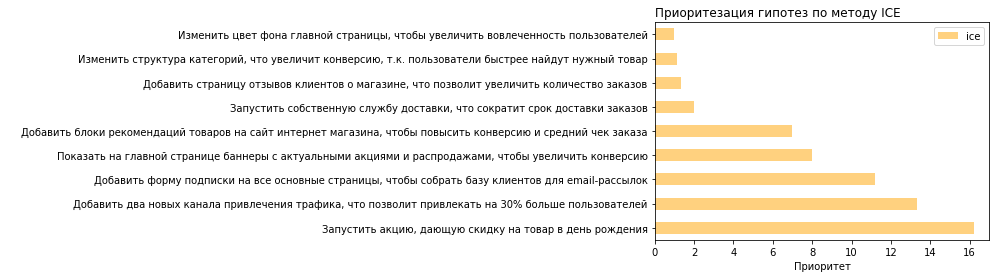

In [14]:
ax = (hypothesis[['hypothesis', 'ice']]
      .set_index('hypothesis')
      .sort_values('ice', ascending=False)
      .plot(kind='barh', color='orange', alpha=0.5)
     )
ax.grid(False)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE', loc='left')
plt.show()

Итак, мы видим топ-5 гипотез, которым следует уделить пристальное внимание. Добавим к расчету параметр Reach (англ.: Охват) и приоритезируем гипотезы по методу RICE.

#### 2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [15]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20


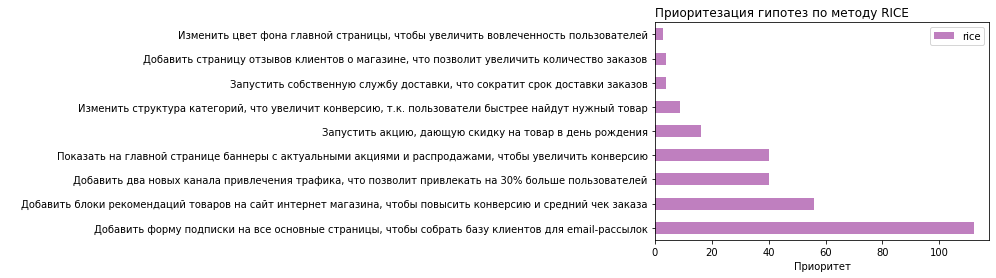

In [16]:
ax = (hypothesis[['hypothesis', 'rice']]
      .set_index('hypothesis')
      .sort_values('rice', ascending=False)
      .plot(kind='barh', color='purple', alpha=0.5)
     )
ax.grid(False)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE', loc='left')
plt.show()

Мы видим те же самые гипотезы, только в другой последовательности.

#### 3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [17]:
hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20


Разница приоритезиций заключается в том, что одна учитывает кол-во пользователей, которых затронут изменения, а другая - нет.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Хорошая работа, корректно применены фреймворки и проанализированы полученные результаты. 
        
    
Еще результаты можно в единой таблице, для наглядности, можно было бы проранжировать и выделить цветом: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

  
</div>

## Часть 2. Анализ A/B-теста

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
  
  ❌ Остается не выполненным на этапе предобработки, но тем не менее важным - проверить корректность разбиения пользователей на группы - может быть есть пользователи, попавшие в обе группы? Если таковые пользователи есть, нужно их выявить и выработать стратегию работы с такими данными. Пересечение групп сильно влияет на результаты теста, если процент достаточно большой. Если есть возможность их можно удалить и посмотреть, какие результаты получаются без них, в любом случае к результатам теста придется относится осторожно.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал выше.</div>


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера v.2</b>
    
  ⚠️ Смотри, в visits у нас кумулятивные данные, мы их не сможем убрать. Т.е. можно убрать только пересечение по покупкам orders:  если мы считаем только по заказам - средний чек, кумулятивную выручку. Так данные будут чище.\
    А для расчета конверсии их лучше оставить. Поэтому таких пользователей можно лучше удалить, но допустимо и оставить, НО обязательно в итоговом выводе написать про наличие таких пользователей. В идеале считать раздельно: с удаленными - средний чек, с не удаленными - количество заказов. 
</div> 

#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Чтобы построить графики по кумулятивным (накапливаемым) данным, необходимо собрать соответствующий агрегированный датафрейм, содержащий информацию о дате, группе (А или В), кумулятивных количестве заказов и пользователей их оформивших, среднем чеке и, наконец, о кумулятивном количестве посетителей магазина.

In [18]:
# создаем массив уникальных пар значений дат и групп теста
dates_grouped = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_grouped = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_grouped.head(6)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996


In [19]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitors_grouped = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_grouped.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [20]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulative_data = orders_grouped.merge(
    visitors_grouped, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Добавим расчетную колонку с конверсией.

In [21]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.03
1,2019-08-01,B,21,20,101217,713,0.03
2,2019-08-02,A,44,38,242401,1338,0.03
3,2019-08-02,B,45,43,266748,1294,0.03
4,2019-08-03,A,68,62,354874,1845,0.04
5,2019-08-03,B,61,59,380996,1803,0.03


#### выручка по группам

Построим график кумулятивной выручки по группам.


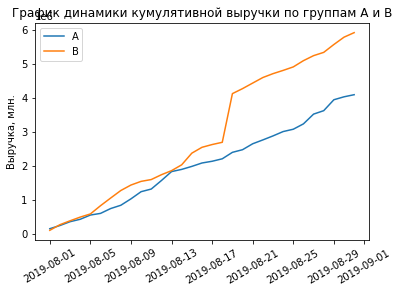

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Видим, что кумулятивная выручка группы А растет линейно, и она меньше, чем у группы В.

При этом в группе В есть резкий скачок в районе 18-го августа, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ График построен верно и можем зафиксировать аномалию в группе В.
</div>

#### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим график динамики кумулятивного среднего чека по группам.

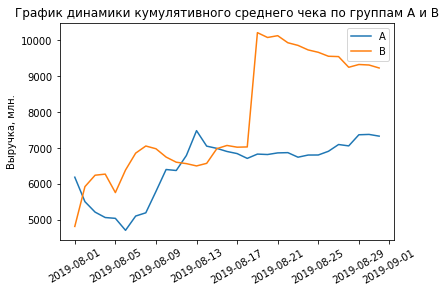

In [23]:
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Мы видим, что средний чек в группе А через какое-то время стабилизировался. Средний чек группы В показал резкий рывок, что говорит в пользу версии о дорогой покупке.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Да, тут так-же группа В выделяется.
</div>

#### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

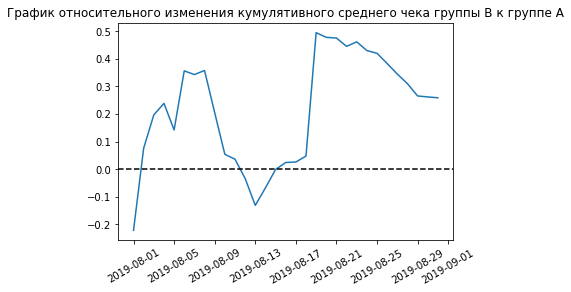

In [24]:
# собираем данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
plt.plot(cumulative_revenue_ab['date'], 
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()


График резко скачет в нескольких точках - определённо, имеют место какие-то выбросы и крупные заказы.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Верно, похоже на крупные заказы.
</div>

#### 4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Аналогично проанализируем график кумулятивной конверсии по группам А и В.

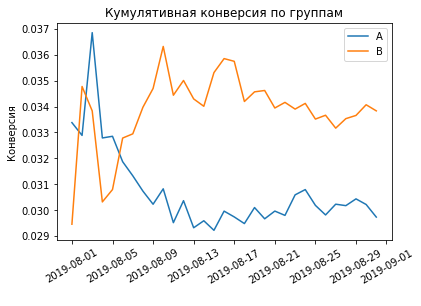

In [25]:
# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel(' ')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.show()

Сначала конверсии колебались, но довольно быстро выровнялись; результат группы В кажется более привлекательным.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Согласен, группа В в лидерах.
</div>

#### 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия кумулятивных конверсий.

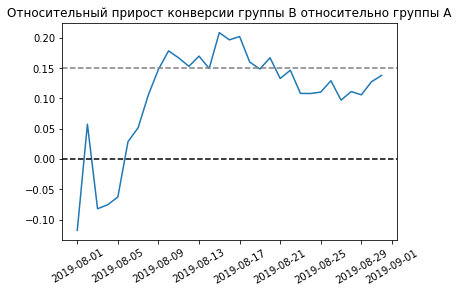

In [26]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']))

plt.plot(
    cumulative_conversions_ab['date'], 
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30)
plt.show()

В начале теста группа В проигрывала группе А, но затем вырвалась вперед. Ее конверсия стремительно росла, далее начался медленный спад. Теперь конверсия группы В снова растет.   

Но мы помним, что графики выше сигнализировали нам о наличии крупных заказов.   
Необходимо проанализировать данные после чистки от выбросов еще раз.


<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Да, группа В выше, а еще в последней трети эксперимента наблюдается стабилизация результатов.
</div>


#### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Пользователи, совершившие много заказов влияют на числитель формулы конверсии (отношение количества заказов к количеству поситителей интернет-магазина за время теста).

"Обычный" пользователь редко совершает более одного-двух заказов в короткий срок (если только речь не идет о сайтах с регулярным спросом (например, продуктовый интернет-магазин)). Посмотрим, что с количеством заказов происходит с участниками нашего тестирования.

count   1031.00
mean       1.16
std        0.72
min        1.00
25%        1.00
50%        1.00
75%        1.00
max       11.00
Name: orders, dtype: float64

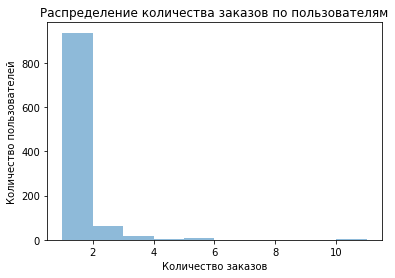

In [27]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users['orders'].describe())

# строим гистограмму
plt.hist(orders_by_users['orders'], alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Большинство пользователей оформляли заказ один раз, но есть и те, кто успел сделать за месяц одиннадцать заказов.

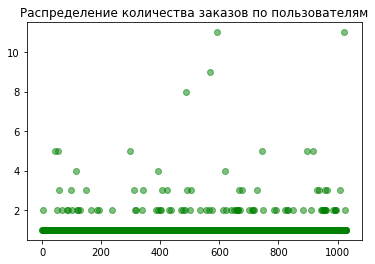

In [28]:
x_values = pd.Series(range(0,len(orders_by_users)))

# строим точечную диаграмму
plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.show()

Много пользователей с 2-3 заказами. Их точная доля не ясна, поэтому сложно понять, можно ли считать их выбросами или нет.


#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [29]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более.
Примем за верхнюю границу 4 заказа на одного пользователя.

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Перцентали выбраны верно. Но скорее всего, после обнаружения пользователей, которые вошли в обе группы (что не совсем верно) границы выбросов изменятся. Еще раз перепроверь свое решение после дополнения части с предобработкой.
</div>

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Изучим гистограмму стоимости заказов.

count      1197.00
mean       8348.01
std       39191.13
min          50.00
25%        1220.00
50%        2978.00
75%        8290.00
max     1294500.00
Name: revenue, dtype: float64

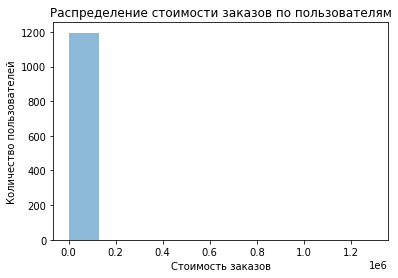

In [30]:
display(orders['revenue'].describe())

# строим гистограмму
plt.hist(orders['revenue'], alpha=0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

Один из заказов - почти 1.3 млн.!

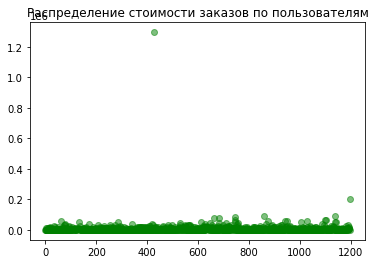

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим точечную диаграмму
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Опять мы видим этот гигантский заказ, который вызвал всплеск на графиках кумулятивных метрик, а так же другие весомые заказы, которые могут повлиять на результат исследований.

Пострим аналогичный график без двух крупных выбросов, которые заметили выше.

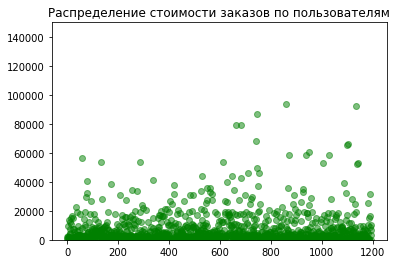

In [32]:
# строим точечную диаграмму
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Мы видим, что основная масса заказов не привышает 20000.

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитаем 95-й и 99-й перцентили стоимости заказов на пользователя и выберим границу для определения аномалий.

In [33]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Определяем границу по величине 99% перцентиля (58233)

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Здесь тоже границы выбросов должны скорректироваться.
</div>

#### 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Ранее мы результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы. Потом увидели выбросы и нашли границу для их определения.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным — без удаления аномальных пользователей.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в в среднем количестве заказов между группами нет}\\
   H_1 :\text{различия в в среднем количестве заказов между группами есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$ 



Начнём с подготовки данных.


<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Нулевая и альтернативная гипотезы сформулированы.
    
</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Только у нас тут количество заказов.
</div>

Так как данные о продажах и средних чеках редко бывают нормально распределены (это классический пример переменных, подверженных выбросам), для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
Для уровеня значимости установим стандартный уровень статистической значимости, равный 0.05.

In [34]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left'))

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


 Итак, у нас получилсь следующая таблица.

`date` — дата;   
`orders_daily_a` — количество заказов в выбранную дату в группе A;   
`revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;   
`orders_daily_a` — количество заказов в выбранную дату в группе B;   
`revenue_per_date_a` — суммарная выручка в выбранную дату в группе B;   
`orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;   
`revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;   
`orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;   
`revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;   
`visitors_per_date_a` — количество пользователей в выбранную дату в группе A;   
`visitors_per_date_b` — количество пользователей в выбранную дату в группе B;   
`visitors_cummulative_a` — количество пользователей до выбранной даты включительно в группе A;     
`visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.    


Создадим переменные orders_by_users_a и orders_by_users_a; в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [35]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [36]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0)


Задаем функцию, в которой:

- задаем уровень значимости alpha=0.05,
- применим критерий Манна-Уитни,
- отформатируем p-value, округлив его до трёх знаков после запятой,
- выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1, округлив до трёх знаков после запятой.

In [37]:
# Функция для проверки гипотезы о равенстве групп data A и data B
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = st.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

In [38]:
stat_significance(sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


По неочищенным данным различия в в среднем количестве заказов между группами есть.   
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.81%.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Верно выбран сам тест и верно проинтерпретированы  его результаты! 
</div>

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем чеке между группами нет}\\
   H_1 :\text{различия в среднем чеке между группами есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$ 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами.

In [39]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


P-value значительно больше 0.05. По сырым данным наблюдаемое различие в 25.871% не является статически значимым по среднему чеку между группами. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ С одной стороны не отвергаем нулевую гипотезу, но потом говорим, что " Впрочем, средний чек группы B значительно выше среднего чека группы A.". Выводы немного противоречат друг другу. Тут лучше изменить интерпретацию: наблюдаемое различие в 25.871%... не является стат. значимым... и .т.д.

</div>   

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Так вывод звучит корректней. 
    
Тут все просто. Раз теcт показал, что нет стат значимой разницы между группами - то каково бы различие чека не было, оно не будет являться стат. значимым (у нас тут выбросы дают большое различие чеков, но их всего несколько и на общее различие среднего чека по группам они не влияют)
</div>

#### 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — `users_with_many_orders` и пользователей, совершивших заказы дороже 58233 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`.     
Узнаем, сколько всего аномальных пользователей методом shape().

In [40]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Всего 15 аномальных пользователей.    
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [41]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [42]:
stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


На очищенных данных разница в конверсии между группами есть, а относительный прирост конверсии группы В отнистельно группы А увеличился на 15.3%.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Верно! И тут отвергаем нулевую гипотезу.
</div>

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Подсчитаем статистическую значимость различий в среднем чеке после удаления аномальных пользователей.

In [43]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
    )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


P-value значительно больше 0.05. По разнице средних чеков групп различий практически нет.  Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Согласен, только обрати, пожалуйста, внимание на выводы: в начале мы можем говорить о наблюдаемых различиях, а потом показать - являются ли они стат. значимыми или нет.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Хорошо.
</div>

#### 14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.


* Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в А, на 14-15%;    

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом средний чек группы В выше (на "очищенных" данных  -  на ~2%);   

* График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А;

На основании вышеизложенного рекомендуем **остановить тест**, зафиксировав победу группы B (ее конверсия значительно  выше конверсии группы А). 

## Выводы и рекомендации

На основании входных данных, предоставленных интернет-магазином был проведено исследование и вынесены рекомендации, изложенные ниже.
    
**В части приоритизации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:**   
- "Запустить акцию, дающую скидку на товар в день рождения",   
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",   
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";      

Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то места необходимо распределить таким образом:   
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",    
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",   
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 	

**В части анализа А/В теста:** рекомендуем остановить тест, зафиксировав победу группы B (ее конверсия значительно  выше конверсии группы А). 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️  Верно! Тут тест окрасился только на половину - по количеству заказов. Но это тоже хорошо, т.к. стат.значимой разницы по среднему чеку нет (чек не увеличился, но и не уменьшился) то при возросшем количестве заказов с сохранившимся средним чеком выручка будет так-же расти! И значит мы заканчиваем анализ A/B-теста - он оказался успешным! 🙂

</div>

<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
 
  📃 Проверить корректность разбиения пользователей на группы.
    
  📃 Пересмотреть выбросы по количеству и стоимости заказов.
    
  📃 Проверить выводы теста среднего чека по сырым и очищенным данным.

      
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>